# diff_meth_pos --> diff_meth_regions
loading data

In [1]:
#! pip3 install statsmodels
import methylize
import pandas as pd
from pathlib import Path
betas = pd.read_pickle('/Volumes/LEGX/SCS/GSE69238/beta_values.pkl')
meta = pd.read_pickle('/Volumes/LEGX/SCS/GSE69238/GSE69238_GPL13534_meta_data.pkl')
import methylprep
import methylcheck
array_type = methylcheck.detect_array(betas, returns='name', on_lambda=False)
manifest = methylprep.Manifest(methylprep.ArrayType(array_type))
meta.head()

INFO:methylprep.files.manifests:Reading manifest file: HumanMethylation450k_15017482_v3.csv


,GSM_ID,Sample_Name,source,platform,title,gender,stroke subtype,sample type,disease state,description,age,Sample_ID,Sentrix_ID,Sentrix_Position
0,GSM1693270,genomic DNA from blood 9403904025_R01C01,blood,GPL13534,genomic DNA from blood 9403904025_R01C01,Male,lacunar,blood,stroke,stroke blood sample,,,,
1,GSM1693271,genomic DNA from blood 9403904025_R01C02,blood,GPL13534,genomic DNA from blood 9403904025_R01C02,Male,lacunar,blood,stroke,stroke blood sample,,,,
2,GSM1693272,genomic DNA from blood 9403904025_R02C01,blood,GPL13534,genomic DNA from blood 9403904025_R02C01,Male,lacunar,blood,stroke,stroke blood sample,,,,
3,GSM1693273,genomic DNA from blood 9403904025_R02C02,blood,GPL13534,genomic DNA from blood 9403904025_R02C02,Male,lacunar,blood,stroke,stroke blood sample,,,,
4,GSM1693274,genomic DNA from blood 9403904025_R03C01,blood,GPL13534,genomic DNA from blood 9403904025_R03C01,Male,lacunar,blood,stroke,stroke blood sample,,,,


# selecting a subset of samples and subset of probes to test
Needed to filter so that Sample_IDs match across both data frames. The GSE default data was missing Sample_IDs for many samples.
With only 2 groups we can do linear regression.

In [2]:
groups = meta[ meta['stroke subtype'].isin(['cardioembolic','small-vessel disease']) & (meta['Sample_ID'] != '') ]
print( meta[ meta['Sample_ID'] != '' ]['stroke subtype'].value_counts() )
subgroup = betas.filter( groups['Sample_ID'])
sample = subgroup.sample(100000)
groups = groups[ groups['Sample_ID'].isin(sample.columns)]
sample

cardioembolic           109
small-vessel disease     58
atherotrombotic          18
Name: stroke subtype, dtype: int64


,9969477167_R02C01,9969477167_R02C02,9969477167_R03C01,9969477167_R03C02,9969477167_R04C01,9969477167_R04C02,9969477167_R05C01,9969477167_R05C02,9969477167_R06C01,9969477167_R06C02,...,9980102020_R04C01,9980102020_R04C02,9980102020_R05C01,9980102020_R06C01,9980102044_R01C02,9980102044_R02C02,9980102044_R03C01,9980102044_R03C02,9980102044_R05C02,9980102075_R01C02
IlmnID,,,,,,,,,,,,,,,,,,,,,
cg15024936,0.022992,0.034420,0.067470,0.052813,0.072282,0.067537,0.072500,0.076834,0.060140,0.072363,...,0.067817,0.107733,0.081095,0.066297,0.102436,0.084757,0.085218,0.091517,0.095925,0.062712
cg17811978,0.582802,0.578712,0.473054,0.745948,0.614161,0.891130,0.693217,0.843222,0.823441,0.775040,...,0.448886,0.676077,0.664895,0.630895,0.596684,0.603490,0.718316,0.792063,0.796510,0.632467
cg09436171,0.876266,0.921603,0.898952,0.899348,0.852522,0.847167,0.859428,0.817367,0.848325,0.851490,...,0.920943,0.887046,0.910669,0.883993,0.891228,0.900207,0.902062,0.913934,0.891023,0.912958
cg17456522,0.902062,0.852485,0.707123,0.896710,0.858203,0.935952,0.885980,0.912075,0.905734,0.892417,...,0.709606,0.890295,0.895343,0.879564,0.872564,0.845096,0.910374,0.900515,0.926413,0.911649
cg07983905,0.012689,0.009619,0.017366,0.033091,0.039480,0.018389,0.033450,0.028517,0.029642,0.027113,...,0.028663,0.077001,0.080618,0.020381,0.035157,0.059825,0.024555,0.034741,0.065981,0.047440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg26525121,0.921044,0.893853,0.884474,0.797191,0.873482,0.852180,0.871299,0.820687,0.826658,0.836397,...,0.848009,0.868017,0.893255,0.900231,0.893008,0.824186,0.883213,0.882932,0.892176,0.904895
cg16451909,0.587863,0.602931,0.734373,0.842781,0.835200,0.889477,0.840796,0.874770,0.887339,0.865207,...,0.843168,0.894904,0.911254,0.887175,0.864525,0.874819,0.867539,0.912517,0.920776,0.905152
cg13189718,0.914772,0.923508,0.898186,0.914533,0.881937,0.880171,0.867703,0.873297,0.849892,0.897155,...,0.906309,0.887690,0.918114,0.921455,0.873447,0.901968,0.913531,0.885810,0.868328,0.901734


In [3]:
stats = methylize.diff_meth_pos(sample, groups, column='gender')#'stroke subtype')
stats

INFO:methylize.diff_meth_pos:Converted phenotype: {'Female': 0, 'Male': 1} (N: {'Female': 81, 'Male': 77})


  0%|          | 0/100000 [00:00<?, ?it/s]

,Coefficient,StandardError,PValue,95%CI_lower,95%CI_upper,Rsquared,FDR_QValue
cg06616857,-4.964009e-01,0.003593,4.874026e-165,-0.995996,-0.995882,9.918953e-01,4.874026e-160
cg04149024,-4.748344e-01,0.003708,6.153940e-160,-0.995346,-0.995209,9.905782e-01,3.076970e-155
cg13023833,-5.861859e-01,0.005049,2.300808e-153,-0.994376,-0.994150,9.885608e-01,7.669359e-149
cg23936476,-4.771445e-01,0.004244,3.294321e-151,-0.993986,-0.993784,9.878092e-01,8.235803e-147
cg11152253,-5.637234e-01,0.005062,1.429928e-150,-0.993891,-0.993645,9.875776e-01,2.859857e-146
...,...,...,...,...,...,...,...
cg09490756,-6.613182e-08,0.002044,9.999742e-01,-0.004009,0.004004,6.710088e-12,9.999932e-01
cg08868423,-7.038738e-07,0.007273,9.999229e-01,-0.014261,0.014245,6.004616e-11,9.999932e-01
cg15233126,6.610957e-08,0.001530,9.999656e-01,-0.002995,0.003002,1.196817e-11,9.999932e-01
cg02687592,2.483670e-07,0.006689,9.999704e-01,-0.013106,0.013112,8.838851e-12,9.999932e-01


# read 1660 regions from _dmp_stats.regions.bed.gz
# calculating ACF out to: 302
#           with 12 lags: [1, 31, 61, 91, 121, 151, 181, 211, 241, 271, 301, 331]
# Done with one-time ACF calculation
4870499 bases used as coverage for sidak correction
INFO:methylize.diff_meth_regions:wrote: _dmp_stats.regions-p.bed.gz, (regions with corrected-p < 0.05: 1424)


Total probes to plot: 1099
01 31 | 02 91 | 03 14 | 04 18 | 05 18 | 06 89 | 07 64 | 08 14 | 09 107 | 10 13 | 11 311 | 12 13 | 13 10 | 14 8 | 15 11 | 16 23 | 17 18 | 18 35 | 19 180 | 20 9 | 21 7 | 22 11 | X 4


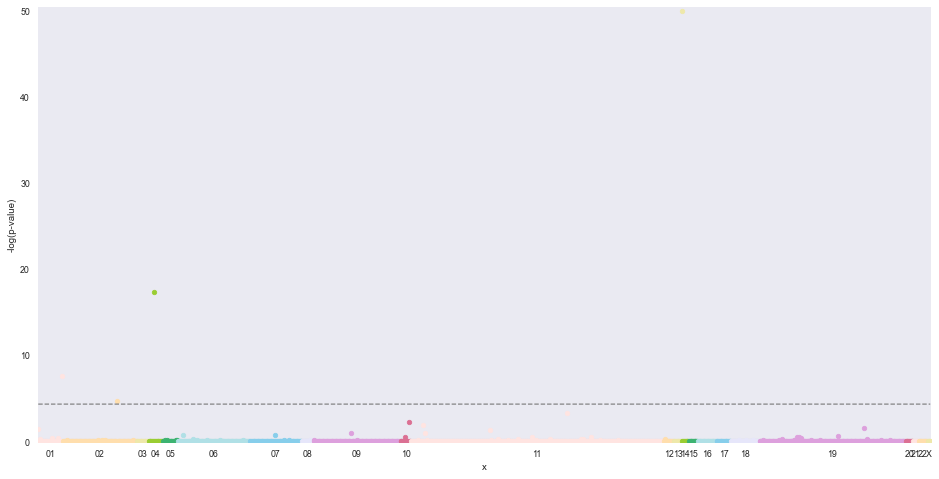

> /Users/mmaxmeister/methylize/methylize/diff_meth_regions.py(252)diff_meth_regions()
    250         # concat fails because FDR/SLK probes can repeat in index. must merge first.
    251         try:
--> 252             stats_df = pd.concat(list(stats_series.values()), axis=1)
    253             stats_df = stats_df.merge(chr_start_end, left_index=True, right_index=True)
    254             stats_file = f"{kw.get('prefix','')}_stats.csv"

ipdb> cont


['_dmp_stats.args.txt',
 '_dmp_stats.acf.txt',
 '_dmp_stats.fdr.bed.gz',
 '_dmp_stats.slk.bed.gz',
 '_dmp_stats.regions-p.bed.gz',
 '_dmp_stats_regions.csv',
 '_dmp_stats_stats.csv',
 '_dmp_stats.bed']

In [8]:
import time
import pandas as pd
from pathlib import Path
files = methylize.diff_meth_regions(stats, manifest, verbose=False, plot=True, 
    genome_build='OLD',
    genome_control=False) # , seed=1e-3, filename='test', prefix='test', step=None)
files

/Users/mmaxmeister/methylize/docs/research_notebooks
3 NaNs dropped
Total probes to plot: 100305
01 9615 | 02 7181 | 03 5275 | 04 4259 | 05 5058 | 06 7568 | 07 6126 | 08 4347 | 09 2065 | 10 5121 | 11 5910 | 12 5089 | 13 2473 | 14 3139 | 15 3201 | 16 4530 | 17 5815 | 18 1232 | 19 5261 | 20 2073 | 21 833 | 22 1737 | X 2298 | Y 99


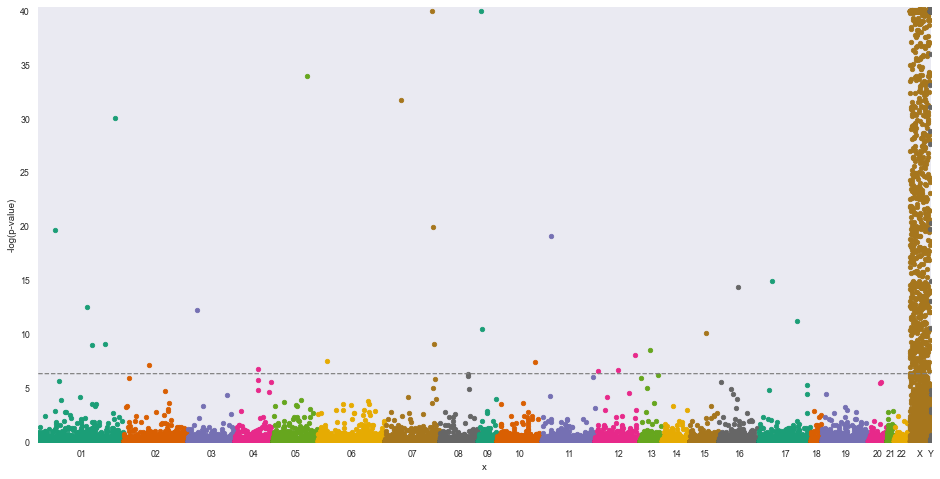

Total probes to plot: 1668
01 11 | 02 12 | 03 5 | 04 5 | 05 9 | 06 2 | 07 2 | 08 4 | 09 3 | 10 3 | 11 6 | 12 2 | 13 6 | 14 1 | 15 5 | 16 3 | 17 5 | 18 2 | 19 8 | 20 4 | 22 1 | X 1495 | Y 74


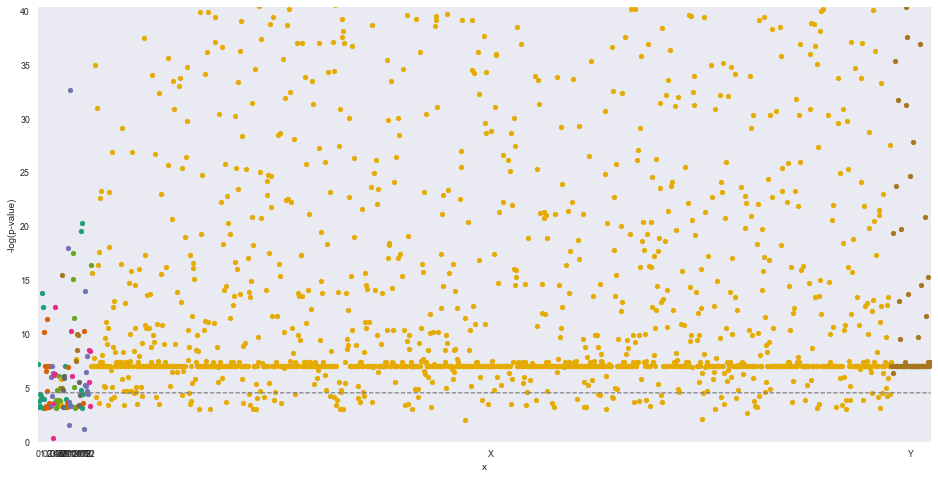

In [5]:
import os;print(os.getcwd())
test = pd.read_csv('_dmp_stats_stats.csv').set_index('name')
test #.hist(bins=300, figsize=(20,6))
methylize.manhattan_plot(test.rename(columns={'fdr-p':'PValue'}), manifest, palette='Dark2', ymax=40)
regions = pd.read_csv('_dmp_stats_regions_genes.csv').set_index('name')
methylize.manhattan_plot(regions.rename(columns={'z_p':'PValue'}), manifest, palette='Dark2', ymax=40)

In [6]:
import methylcheck
data = methylcheck.read_geo('/Volumes/LEGX/SCS/GSE50660_matrix_processed.txt')
data
g69,meta = methylcheck.load_both('/Volumes/LEGX/SCS/GSE69238/')
g69
meta = meta[ meta.Sample_ID.isin(g69.columns) ]
g69pheno = [1 if x == 'Male' else 0 for x in meta.gender]
g69sample = g69.sample(100000) # N = 173
g69stats = methylize.diff_meth_pos(g69sample, g69pheno)
man = methylprep.Manifest('450k')
g69files = methylize.diff_meth_regions(g69stats, man, seed=1e-3, filename='g69', prefix='g69')
stats_file = pd.read_csv('g69_stats.csv').set_index('name')
methylize.manhattan_plot(stats_file.rename(columns={'fdr-p':'PValue'}),  '450k', palette='Gray3')
BED = pd.read_csv('g69_1633558174.bed', sep='\t')
print(len(BED[ BED['chromStart'].isna() ]))
BED[ ~BED['chromStart'].isna() ]

KeyboardInterrupt: 